## IRA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
from pandas.plotting import parallel_coordinates
%matplotlib inline 

In [2]:
df_matriculas = pd.DataFrame()

# importando notas de 2010 a 2017
for i in range(10,18):
    for j in range(1,3):
        print('20'+str(i)+str(j))
        df_matricula = pd.read_csv('data_science/matriculas_new/matricula-componente-20'+str(i)+str(j)+'.csv',sep=';')
        #concatena as tabelas de 2010 a 2017
        df_matriculas = pd.concat([df_matriculas, df_matricula])

# obtendo o id do curso de ciências e tecnologia
df_cursos = pd.read_csv('data_science/cursos-graduacao.csv', sep=';')
id_cet = df_cursos[df_cursos.nome == 'CIÊNCIAS E TECNOLOGIA'].id_curso
id_cet

20101
20102
20111
20112
20121
20122
20131
20132
20141
20142
20151
20152
20161
20162
20171
20172


17    10320810
Name: id_curso, dtype: int64

In [3]:
# filtra tabela pelo id_curso
df_matriculasCeT = df_matriculas[df_matriculas.id_curso == float(id_cet)]

# columns = ['descricao', 'discente', 'faltas_unidade', 'id_curso', 'id_turma', 'media_final', 'nota', 'numero_total_faltas', 'reposicao', 'unidade']
# df_matriculas = df_matriculas[columns]

In [5]:
aux_teste = df_matriculas[df_matriculas.discente=='72eca9ca3b69e98cb6b5512b3d834913']

In [6]:
df_matriculasCeT.columns

Index(['Unnamed: 10', 'descricao', 'discente', 'faltas_unidade', 'id_curso',
       'id_turma', 'media_final', 'nota', 'numero_total_faltas', 'reposicao',
       'unidade'],
      dtype='object')

In [7]:
df_turmas = pd.read_csv('data_science/turmas-2010-2017-ok.csv')
df_turmas.columns

/home/andressa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'id_turma', 'codigo_turma', 'id_docente_interno',
       'id_docente_externo', 'observacao', 'id_componente_curricular',
       'nivel_ensino', 'campus_turma', 'local', 'ano', 'periodo',
       'data_inicio', 'data_fim', 'descricao_horario', 'total_solicitacoes',
       'capacidade_aluno', 'tipo', 'distancia', 'data_consolidacao',
       'agrupadora', 'id_turma_agrupadora', 'qtd_aulas_lancadas',
       'situacao_turma', 'convenio', 'modalidade_participantes'],
      dtype='object')

In [8]:
df_componentes = pd.read_csv('data_science/componentes-curriculares-presenciais-ok.csv')
df_componentes.columns

Index(['Unnamed: 0', 'id_componente', 'tipo_componente', 'codigo', 'nivel',
       'nome', 'unidade_responsavel', 'ch_teorico', 'ch_pratico', 'ch_estagio',
       'ch_total', 'ch_dedicada_docente', 'ch_ead', 'cr_max_ead',
       'permite_horario_flexivel', 'qtd_unidades', 'procedimentos_avaliacao',
       'equivalencia', 'pre_requisito', 'co_requisito', 'ementa',
       'bibliografia', 'objetivos', 'conteudo', 'competencias_habilidades',
       'referencias', 'ano_programa', 'periodo_programa', 'modalidade',
       'curso_componente'],
      dtype='object')

In [9]:
df_componentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34951 entries, 0 to 34950
Data columns (total 30 columns):
Unnamed: 0                  34951 non-null int64
id_componente               34951 non-null int64
tipo_componente             34951 non-null object
codigo                      34951 non-null object
nivel                       34951 non-null object
nome                        34950 non-null object
unidade_responsavel         34951 non-null object
ch_teorico                  34951 non-null int64
ch_pratico                  34951 non-null int64
ch_estagio                  34951 non-null int64
ch_total                    34951 non-null int64
ch_dedicada_docente         34951 non-null int64
ch_ead                      34951 non-null int64
cr_max_ead                  34951 non-null int64
permite_horario_flexivel    34951 non-null object
qtd_unidades                28194 non-null float64
procedimentos_avaliacao     4448 non-null object
equivalencia                10332 non-null object


In [10]:
df_discentes = pd.read_csv('../secret/matriculas-2013-2017.csv', sep=';')

In [12]:
colunas_mat = ['discente', 'id_turma', 'media_final']
df_matriculasCeT = df_matriculasCeT[colunas_mat].dropna().drop_duplicates()

In [13]:
df_matriculasCeT.head(2)

,discente,id_turma,media_final
85637,4746f89573bcb024736f649807753654,57549019,8.6
85640,6ac3d868cc23be038b7b6e70afbd372b,57549019,7.6


In [14]:
df_turmasNome = pd.merge(df_turmas, df_componentes, left_on='id_componente_curricular', right_on='id_componente')
df_turmasNome.head(2)

,Unnamed: 0_x,id_turma,codigo_turma,id_docente_interno,id_docente_externo,observacao,id_componente_curricular,nivel_ensino,campus_turma,local,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
0,0,1151160,01,25852.0,NaN,NaN,24054,GRADUAÇÃO,Campus Central,Departamento de Engenharia da Produção,...,x,NaN,Desenvolver no aluno o uso e o aprimoramento d...,1.\t Teoria das Filas; 2.\t Geração de Números...,O aluno deverá desenvolver as habilidades e co...,"[1] Andrade, Eduardo Leopoldino. Introdução à ...",2009.0,2.0,Presencial,NaN
1,1,1151161,01,5753006.0,NaN,NaN,24061,GRADUAÇÃO,Campus Central,Departamento de Engenharia da Produção,...,x,NaN,Proporcionar capacidades e habilidades para qu...,EMENTA:Papel da função produção. Objetivos de ...,A disciplina proporcionará ao acadêmico as seg...,"Montgomery, Cynthia e Michael E. Porter, 1998,...",2011.0,2.0,Presencial,NaN


In [15]:
colunas_turma = ['id_turma', 'nome', 'ch_total']
df_turmasNome = df_turmasNome[colunas_turma]
df_turmasNome.head(2)

,id_turma,nome,ch_total
0,1151160,SIMULACAO,60
1,1151161,ESTRATEGIA DE PRODUCAO,60


In [16]:
df_ira = pd.merge(df_matriculasCeT, df_turmasNome, on='id_turma').drop_duplicates()
df_ira.head(2)

,discente,id_turma,media_final,nome,ch_total
0,4746f89573bcb024736f649807753654,57549019,8.6,TÓPICOS ESPECIAIS EM COMPUTAÇÃO XIV,60
2,6ac3d868cc23be038b7b6e70afbd372b,57549019,7.6,TÓPICOS ESPECIAIS EM COMPUTAÇÃO XIV,60


In [17]:
df_ira['notaXch'] = df_ira['media_final']*df_ira['ch_total']

In [18]:
df_sumNotaCh = df_ira.groupby('discente').notaXch.sum().reset_index()
display(df_sumNotaCh.head(2))

df_sumCh = df_ira.groupby('discente').ch_total.sum().reset_index()
display(df_sumCh.head(2))

,discente,notaXch
0,0004fd054c6915cbd14905a92c38d40a,1749.0
1,0010345ff1be7da25478b5a96c772616,8703.0


,discente,ch_total
0,0004fd054c6915cbd14905a92c38d40a,610
1,0010345ff1be7da25478b5a96c772616,1710


In [19]:
df_calIra = pd.merge(df_sumNotaCh, df_sumCh, on='discente')
df_calIra['ira'] = df_calIra['notaXch']/df_calIra['ch_total']

df_calIra.head(2)

,discente,notaXch,ch_total,ira
0,0004fd054c6915cbd14905a92c38d40a,1749.0,610,2.867213
1,0010345ff1be7da25478b5a96c772616,8703.0,1710,5.089474


In [20]:
df_calIra[df_calIra['discente'] == '8032c974c90eae91a881657fc16092f2']

,discente,notaXch,ch_total,ira


In [21]:
import seaborn as sns

[(0, 10)]

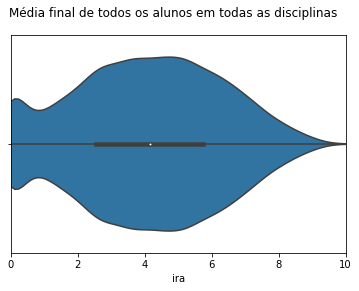

In [22]:
fig = plt.figure()
fig.suptitle('Média final de todos os alunos em todas as disciplinas')
graf = sns.violinplot(df_calIra['ira'])
graf.set(xlim=(0, 10))

In [23]:
df_calIra[df_calIra['discente'] == '72eca9ca3b69e98cb6b5512b3d834913']

,discente,notaXch,ch_total,ira
4796,72eca9ca3b69e98cb6b5512b3d834913,16732.0,2410,6.942739


In [26]:
df_merge = pd.merge(df_discentes,df_calIra, left_on='id_discente', right_on='discente')

In [25]:
df_merge.corr()

,ano_ingresso,periodo_ingresso,nota_ingresso,notaXch,ch_total,ira
ano_ingresso,1.000000,-0.005512,0.021641,-0.412406,-0.510822,-0.048076
periodo_ingresso,-0.005512,1.000000,0.021866,-0.163953,-0.106255,-0.146494
nota_ingresso,0.021641,0.021866,1.000000,0.060269,0.059582,0.032474
notaXch,-0.412406,-0.163953,0.060269,1.000000,0.902223,0.666703
ch_total,-0.510822,-0.106255,0.059582,0.902223,1.000000,0.432117
ira,-0.048076,-0.146494,0.032474,0.666703,0.432117,1.000000
